<a href="https://colab.research.google.com/github/MelissaMatindi/iris_dataset_analysis/blob/main/iris_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🌸IRIS DATASET ANALYSIS**


This project analyzes the Iris dataset, a classic dataset for classification, containing 150 samples of iris flowers with 4 features (sepal length, sepal width, petal length, petal width) and a species label (setosa, versicolor, virginica). The goal is to load, explore, analyze, and visualize the data using pandas, matplotlib, and seaborn, following the Ubuntu principle of community by sharing clear insights.

## **Objectives**
- Load and explore the dataset.
- Compute basic statistics and group by species.
- Create four visualizations: line chart, bar chart, histogram, scatter plot.
- Document findings with clear explanations and proper plot customization.

In [ ]:
# ==========================================================
#  Import Required Libraries
# ==========================================================
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.datasets import load_iris

    print("✅ Libraries imported successfully.")
except ImportError as e:
    print(f"❌ Error importing libraries: {e}")
    print("Install with: pip install pandas matplotlib seaborn scikit-learn")

# Set seaborn style for better visuals
sns.set_style("whitegrid")


✅ Libraries imported successfully.


##  **Load and Explore the Dataset**

We will:
- Load the dataset using `sklearn.datasets.load_iris`
- Convert it into a pandas DataFrame
- Add the target species column
- Take a quick look at the first rows


In [ ]:
# Load Dataset
try:
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

    print("✅ Dataset loaded successfully.")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

✅ Dataset loaded successfully.


In [ ]:
# Preview the dataset
print("\n First 5 rows:")
display(df.head())


 First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Dataset info
print("\n Dataset Info:")
df.info()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [ ]:
# Check missing values
print("\n Missing values:")
print(df.isnull().sum())


 Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


##  **Cleaning the Dataset**

Even though the Iris dataset is usually clean,  it’s good practice to check for and handle missing values.


In [ ]:
#  Data Cleaning
missing_counts = df.isnull().sum()

print("Missing values in each column:\n", missing_counts)

if missing_counts.sum() > 0:
    df = df.dropna()
    print("\n⚠️ Missing values found → Dropped rows with missing data.")
else:
    print("\n✅ No missing values found. Dataset is clean.")


Missing values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

✅ No missing values found. Dataset is clean.


## **Basic Data Analysis**


We compute basic statistics for numerical columns and group by species to find average measurements. This helps identify patterns in the Iris dataset.

In [ ]:
# Compute basic statistics for numerical columns
print("Basic statistics of numerical columns:")
print(df.describe())

Basic statistics of numerical columns:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
# Group by species and compute mean for each numerical column
print("\nMean values by species:")
group_means = df.groupby('species').mean()
print(group_means)


Mean values by species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


/tmp/ipython-input-1906052139.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df.groupby('species').mean()


In [ ]:
print(df.groupby('species').std())

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa               0.352490          0.379064           0.173664   
versicolor           0.516171          0.313798           0.469911   
virginica            0.635880          0.322497           0.551895   

            petal width (cm)  
species                       
setosa              0.105386  
versicolor          0.197753  
virginica           0.274650  


/tmp/ipython-input-2176475227.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('species').std())


#### **Findings from Analysis**

- **Sepal Length**: Virginica has the highest average sepal length (6.59 cm), while setosa has the lowest (5.01 cm).
- **Petal Length**: Virginica’s petals are much longer (5.55 cm) than setosa’s (1.46 cm), suggesting *petal length is a strong discriminator*.
- **Variability**: Petal length has a higher standard deviation (1.77 cm) than sepal width (0.44 cm), indicating *more spread in petal measurements*.
- **Pattern**: Setosa is consistently smaller across all features, while virginica is larger, which could be useful for classifying species.

### **Data Visualization**

We create visualizations to explore trends, comparisons, distributions, and relationships in the Iris dataset, using matplotlib and seaborn with clear titles, labels, and legends.

In [ ]:
# Ensure plots display in Colab
%matplotlib inline

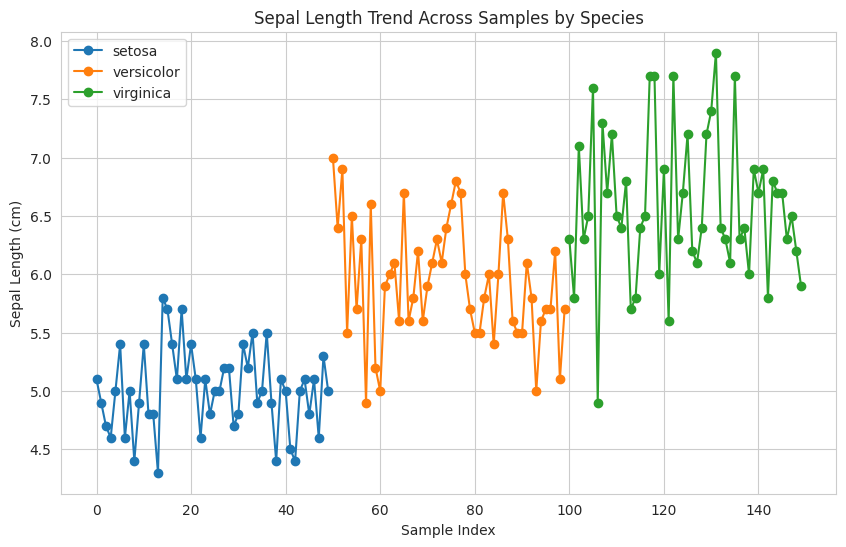

In [16]:
# Line Chart: Sepal length trend across samples by species
plt.figure(figsize=(10, 6))
for species in df['species'].unique():
    species_data = df[df['species'] == species]['sepal length (cm)']
    plt.plot(species_data.index, species_data, label=species, marker='o')
plt.title('Sepal Length Trend Across Samples by Species')
plt.xlabel('Sample Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.show()

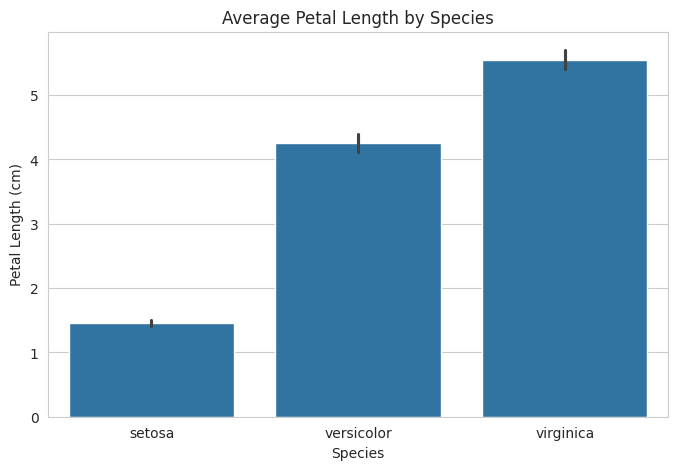

In [17]:
# Bar Chart: Average petal length by species
plt.figure(figsize=(8, 5))
sns.barplot(x='species', y='petal length (cm)', data=df)
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

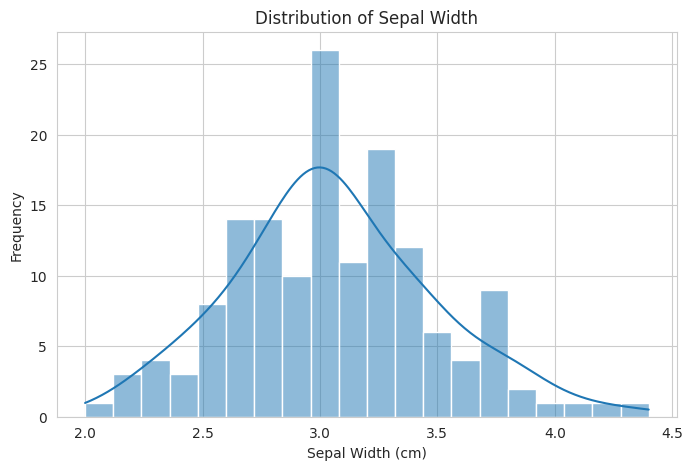

In [18]:
# Histogram: Distribution of sepal width
plt.figure(figsize=(8, 5))
sns.histplot(df['sepal width (cm)'], bins=20, kde=True)
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

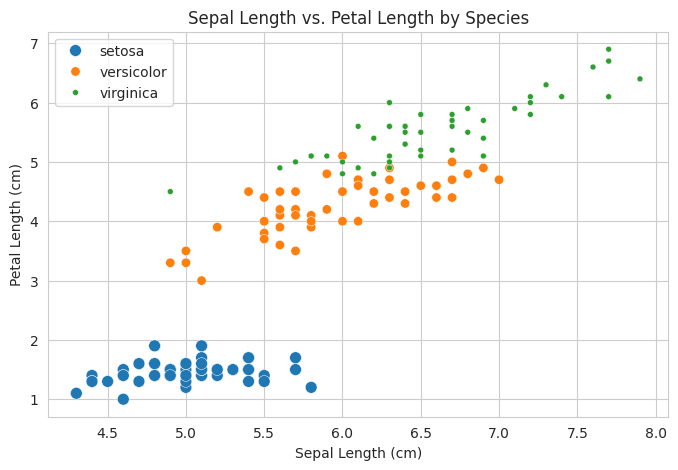

In [19]:
# Scatter Plot: Sepal length vs. petal length by species
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', size='species', data=df)
plt.title('Sepal Length vs. Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()

#### **Visualization Insights**
- **Line Chart**: Shows sepal length varies within species; setosa has consistently lower values.
- **Bar Chart**: Virginica has the longest average petal length, setosa the shortest, confirming earlier findings.
- **Histogram**: Sepal width is roughly normally distributed, centered around 3 cm, with some spread.
- **Scatter Plot**: Clear separation between species, especially setosa, suggesting sepal and petal length are strong predictors for classification.